# Process BOLFI reconstructed positions
First test, all default settings

*Bart Pelssers, 25-04-2018*

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
plt.rc('font', size=16)

In [69]:
data = defaultdict(list)

#filename = "bolfi_results_run3_llcs_deadpmts/bolfi_result_%d.pkl"  # 500            # BOLFI_mean 0.98 cm, TPF 0.71 cm
#filename = "bolfi_results_run4_llcs_deadpmts/pkl/bolfi_result_%d.pkl"  # 1, 500     # BOLFI_mean 0.76 cm, TPF 0.68 cm
#filename = "bolfi_results_run5_cosine/pkl/bolfi_result_%d.pkl"  # 36                # BOLFI_mean 0.88 cm, TPF 0.82 cm
#filename = "bolfi_results_run6_sqeuclidean/pkl/bolfi_result_%d.pkl"  # 1, 637       # BOLFI_mean 1.13 cm, TPF 0.64 cm
#filename = "bolfi_results_run7_all_pmts/pkl/bolfi_result_%d.pkl"  # 243             # BOLFI_mean 1.13 cm, TPF 0.64 cm
#filename = "bolfi_results_run10/bolfi_result_%d.pkl"  # 244
#filename = "bolfi_results_run11/bolfi_result_%d.pkl"  # 39, all pmts on, eucli
#filename = "bolfi_results_run12/bolfi_results_%d.pkl"  # 58, all pmts on, eucli
#filename = "bolfi_results_run13/bolfi_results_%d.pkl"  # , all pmts on, cosine
#filename = "bolfi_results_run14/bolfi_results_%d.pkl"  # , all pmts on, max distance
#filename = "bolfi_results_run15/bolfi_results_%d.pkl"  # , all pmts on, correlation distance
filename = "bolfi_results_run16/bolfi_results_%d.pkl"  # , all pmts on, correlation distance, s2_electrons=10

#filename = "bolfi_result_%d.pkl"
algos_set = False
for i in range(1001):
    try:
        with open(filename % i, 'rb') as f:
            single = pickle.load(f)
    except:
        continue
    if not algos_set:
        algos = list(single.keys())
        algos_set = True
    for k, v in single.items():
        for dim in ['x', 'y']:
            data[k + '_' + dim].append(v[dim])

algos.remove('truth')

In [70]:
df = pd.DataFrame(data)
df.head()

,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,PosRecTopPatternFit_x,PosRecTopPatternFit_y,truth_x,truth_y
0,3.463215,-15.819499,3.451827,-15.730490,2.483231,-16.524059,2.755181,-17.759149,2.119674,-16.832707,2.626434,-17.960824
1,12.257837,-5.794016,12.285355,-5.784516,13.141613,-4.587334,12.471118,-5.100413,12.094612,-5.860276,10.907536,-6.312277
2,4.859689,38.130989,4.921711,38.150227,5.393952,37.922665,3.942319,36.648618,3.865288,37.281328,2.726006,37.749081
3,-22.503591,-3.786081,-22.468764,-3.773208,-23.253071,-3.712088,-20.054250,-4.086815,-21.321429,-4.364035,-21.259064,-4.445240
4,-19.568933,-24.396144,-19.664657,-24.358353,-21.568262,-25.902046,-18.514748,-25.424193,-19.077068,-25.062030,-18.078293,-23.212466


In [71]:
df['truth_r'] = (df['truth_x']**2 + df['truth_y']**2)**0.5

In [72]:
print('Mean distance from true position over %d reconstructed events' % len(df))
for algo in algos:
    df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
    print(algo, "%.2f cm" % df[algo + '_d'].mean())

Mean distance from true position over 287 reconstructed events
PosRecTopPatternFit 1.08 cm
BOLFI_median 1.30 cm
BOLFI_mode 2.10 cm
BOLFI_mean 1.29 cm
PosRecNeuralNet 1.42 cm


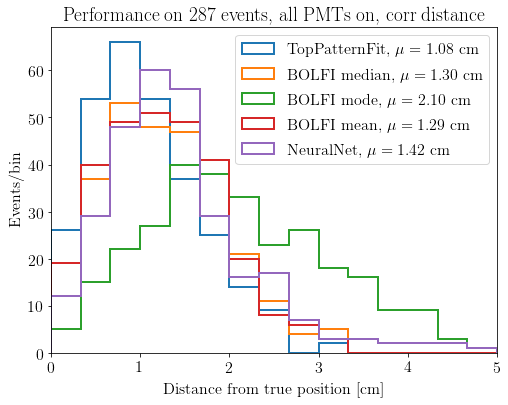

In [73]:
plot_df = df #[df['truth_r'] < 20]

plt.figure(figsize=(8,6))
for algo in algos:
    mu = plot_df[algo + '_d'].mean()
    plt.hist(plot_df[algo + '_d'], bins = 15, range=(0, 5), histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', $\mu=%.2f$ cm' % mu)
plt.legend()
plt.xlabel('Distance from true position [cm]')
plt.ylabel('Events/bin')
plt.xlim(0, 5)
plt.title('Performance on %d events, all PMTs on, corr distance' % len(plot_df)) # $R_{truth} > 30$ cm' % len(plot_df))
#plt.title('Performance on %d events, $R_{truth} > 30$ cm' % len(plot_df))
#plt.savefig('bolfi_run13_pmtson.png', dpi=150)
plt.show()

In [51]:
df.head()

,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,PosRecTopPatternFit_x,PosRecTopPatternFit_y,truth_x,truth_y,truth_r,PosRecTopPatternFit_d,BOLFI_median_d,BOLFI_mode_d,BOLFI_mean_d,PosRecNeuralNet_d
0,3.463215,-15.819499,3.451827,-15.730490,2.483231,-16.524059,2.755181,-17.759149,2.119674,-16.832707,2.626434,-17.960824,18.151841,1.236711,2.378163,1.443884,2.299016,0.239266
1,12.257837,-5.794016,12.285355,-5.784516,13.141613,-4.587334,12.471118,-5.100413,12.094612,-5.860276,10.907536,-6.312277,12.602348,1.270218,1.475437,2.822504,1.446343,1.978232


In [12]:
bins = np.linspace(0, 45, 6)
groups = df.groupby(pd.cut(df.truth_r, bins))

In [13]:
bin_centers = (bins[:-1] + bins[1:])/2

In [14]:
bin_means = defaultdict(list)
bin_stds = defaultdict(list)
bin_vectors = defaultdict(list)
for gid, group in groups:
    for algo in algos:
        bin_means[algo].append(group[algo + '_d'].mean())
        bin_stds[algo].append(group[algo + '_d'].std())
        bin_vectors[algo].append(group[algo + '_d'].values)

In [15]:
bin_means['PosRecTopPatternFit']

[0.5261280068043901,
 0.5772734198611393,
 0.6888997322347566,
 0.6802820367111874,
 0.68264600178281]

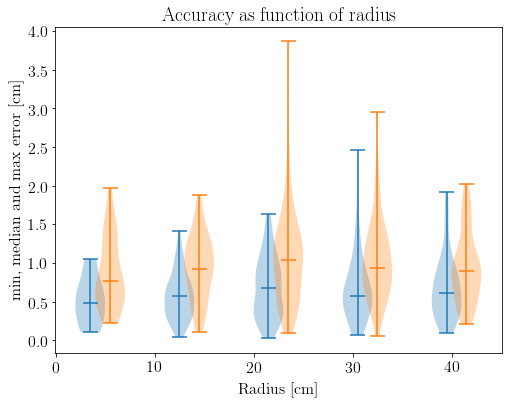

In [17]:
plt.figure(figsize=(8,6))
#for algo in algos:
#    plt.errorbar(bin_centers, bin_means[algo], yerr=bin_stds[algo], label=algo.replace('_', ' ').replace('PosRec', ''))
plt.violinplot(bin_vectors['PosRecTopPatternFit'], showmedians=True, widths=3, positions=bin_centers -1)
#plt.violinplot(bin_vectors['PosRecNeuralNet'], showmedians=True, widths=2, positions=bin_centers + 1)
plt.violinplot(bin_vectors['BOLFI_mean'], showmedians=True, widths=3, positions=bin_centers + 1)

#plt.legend()
plt.ylabel('min, median and max error [cm]')
plt.xlabel('Radius [cm]')
plt.title('Accuracy as function of radius')
plt.show()

In [26]:
#plt.figure(figsize=(8, 8))
#plt.scatter(df['truth_x'], df['truth_y'], s=4)
#plt.scatter(df['BOLFI_x'], df['BOLFI_y'], s=4)
#plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False))
#plt.gca().set_aspect(1)
#plt.xlim(-50, 50)
#plt.ylim(-50, 50)
#plt.show()

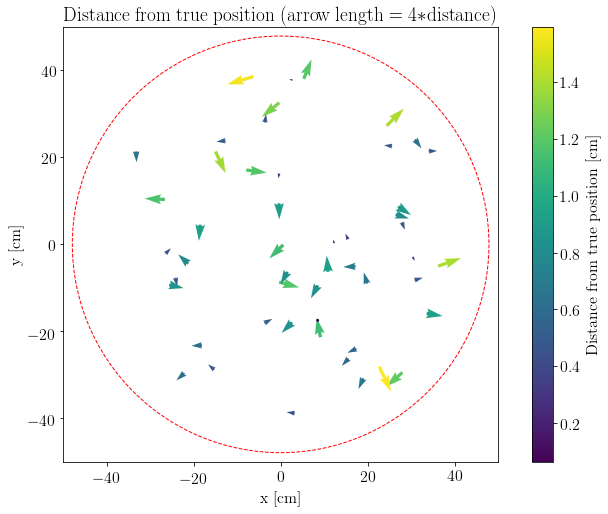

In [21]:
plt.figure(figsize =(12,8))
plt.quiver(df['truth_x'], df['truth_y'],
           df['BOLFI_mean_x'] - df['truth_x'], df['BOLFI_mean_y'] - df['truth_y'],
           df['BOLFI_mean_d'],
           pivot='tail', angles='xy', scale_units='xy', scale=0.25)
plt.colorbar(label='Distance from true position [cm]')
plt.gca().add_artist(plt.Circle((0,0), 47.9, color='red', fill=False, linestyle='--'))
plt.gca().set_aspect(1)
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.title('Distance from true position (arrow length $= 4 * $distance)')
#plt.savefig('bolfi_vectors.png', dpi=150)
plt.show()